### SAMP Vs HAM Pridiction

###### Introduction:-

The phrase "spam vs ham" typically refers to the classification of emails as either spam or legitimate (non-spam) messages. In email filtering systems, "spam" refers to unsolicited or unwanted emails, often containing advertisements, scams, or malicious content. On the other hand, "ham" refers to legitimate emails that are desired and expected by the recipient.

##### Problem statement:-

The task of spam filtering involves developing algorithms and systems that can automatically distinguish between spam and ham emails. These systems analyze various attributes of an email, such as subject line, content, and attachments, to determine its classification. Techniques such as machine learning, rule-based filtering, and content analysis are commonly employed to identify and filter out spam emails, ensuring that the recipient's inbox remains free from unwanted or potentially harmful messages.

##### Importing all the libraries

In [1]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##### Importing the data

In [2]:
Data = pd.read_csv("/content/spam.csv", encoding= 'latin1')
Data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


##### Take the relevent data

In [3]:
Data1 = Data[['v1','v2']]
Data1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
#Renaming the columns
Data1.rename(columns = {'v1':'Category' , 'v2':'Mail'}, inplace = True)

In [5]:
Data1

,Category,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
# Finding Shape of the data
Data1.shape

(5572, 2)

In [7]:
# See count of data which fall under each category
Data1['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

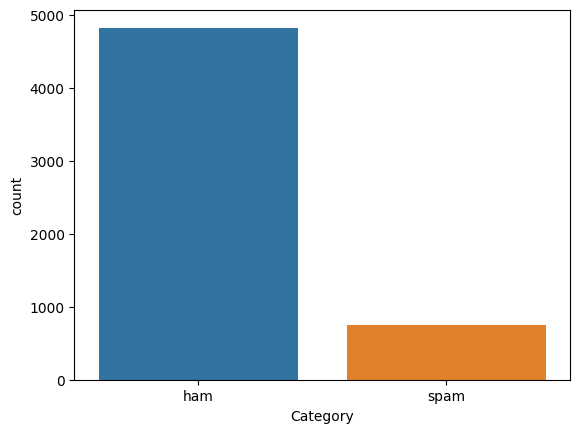

In [8]:
# Countplot to see count of data in eacg category 
sns.countplot(x = Data1['Category'])

### Data Preprocessing

In [9]:
# Removing html tags
def HTMLremover(Text):
  Bus = BeautifulSoup(Text,'html.parser')
  return Bus.get_text()

In [10]:
Data1['Mail'] = Data1['Mail'].apply(lambda Text: HTMLremover(Text))
Data1

,Category,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


###### Dealing with short words

In [11]:
d={'LOL': 'Laugh out loud',
'BRB': 'Be right back',
'OMG': 'Oh my God',
'TTYL': 'Talk to you later',
'BTW': 'By the way',
'SMH': 'Shaking my head',
'IMO': 'In my opinion',
'FYI': 'For your information',
'JK': 'Just kidding',
'ROFL': 'Rolling on the floor laughing',
'NP': 'No problem',
'TMI': 'Too much information',
'ASAP': 'As soon as possible',
'GTG': 'Got to go',
'IMO': 'In my opinion',
'AFK': 'Away from keyboard',
'NVM': 'Never mind',
'OP' : 'Over power',
'ILU': 'I love you',
'BC' : 'Because',
'DM' : 'Direct message',
'FTW': 'For the win',
'IDK': "I don't know",
'IRL': 'In real life',
'LMK': 'Let me know',
'NBD': 'No big deal',
'SU' : 'Shut up',
'THX': 'Thanks',
'ST' : 'Stop talking',
'YOLO':'You only live once',
'WTH' :'What the hack',
'GL' : 'Good luck',
'BOL':'Best of luck',
'OMW': 'On my way',
'IDC': "I don't care",
'TBH': 'To be honest',
'IWB': 'I will be back',
'OTW': 'On the way',
'U'  : 'You',
'WKLY':'Weekly',
'COMP':'Competition',
'R'  : 'Are',
"I'M": 'I am'}

In [12]:
def stort_word3(text):
  T=text.upper()
  t1=nltk.word_tokenize(T)
  for u in t1:
    if u in d:
      e=t1.index(u)
      t1[e]=d[u]
  t1
  T=' '.join(word for word in t1)
  return T.lower()
Data1['Mail']=Data1['Mail'].apply(lambda x:stort_word3(x))
Data1

,Category,Mail
0,ham,"go until jurong point , crazy .. available onl..."
1,ham,ok lar ... joking wif you oni ...
2,spam,free entry in 2 a weekly competition to win fa...
3,ham,you dun say so early hor ... you c already the...
4,ham,"nah i do n't think he goes to usf , he lives a..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home ?
5569,ham,"pity , * was in mood for that . so ... any oth..."
5570,ham,the guy did some bitching but i acted like i '...


##### Removing Punctuation

In [13]:
from string import punctuation
punc=punctuation
my_punc=punc.replace("'",'')
def remove_punc(text):
  return text.translate(str.maketrans('','',my_punc))
Data1['Mail']=Data1['Mail'].apply(lambda text:remove_punc(text))
Data1

,Category,Mail
0,ham,go until jurong point crazy available only i...
1,ham,ok lar joking wif you oni
2,spam,free entry in 2 a weekly competition to win fa...
3,ham,you dun say so early hor you c already then say
4,ham,nah i do n't think he goes to usf he lives ar...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì b going to esplanade fr home
5569,ham,pity was in mood for that so any other sug...
5570,ham,the guy did some bitching but i acted like i '...


##### Removing all Special Characters

In [14]:
def remove_spec(text):
  text=re.sub('http\s+\s',' ',text)
  text=re.sub('#\s+',' ',text)
  text=re.sub('@\s+',' ',text)
  text=re.sub(r'[^\x00-\x7f]', ' ',text)
  text=re.sub('\s+',' ',text)
  return text
Data1['Mail']=Data1['Mail'].apply(lambda x:remove_spec(x))
Data1

,Category,Mail
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif you oni
2,spam,free entry in 2 a weekly competition to win fa...
3,ham,you dun say so early hor you c already then say
4,ham,nah i do n't think he goes to usf he lives aro...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will b going to esplanade fr home
5569,ham,pity was in mood for that so any other suggest...
5570,ham,the guy did some bitching but i acted like i '...


#### WorldCloud

In [15]:
spam_df=Data1[Data1['Category']=='spam']
ham_df=Data1[Data1['Category']=='ham']

In [16]:
from wordcloud import WordCloud
spam_wc=' '.join([words for words in spam_df['Mail']])
ham_wc=' '.join([word_ham for word_ham in ham_df['Mail']])
wc=WordCloud(width=1000,height=500,max_words=150)
wc1=WordCloud(width=1000,height=500,max_words=150)
word1=wc.generate(spam_wc)
word2=wc1.generate(ham_wc)

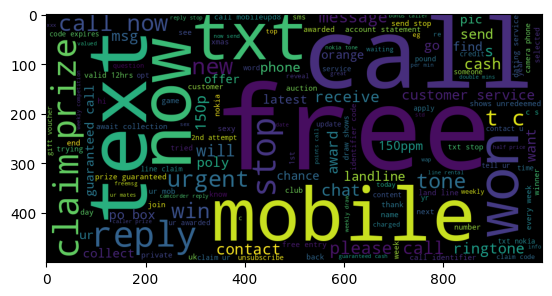

In [17]:
plt.imshow(word1)

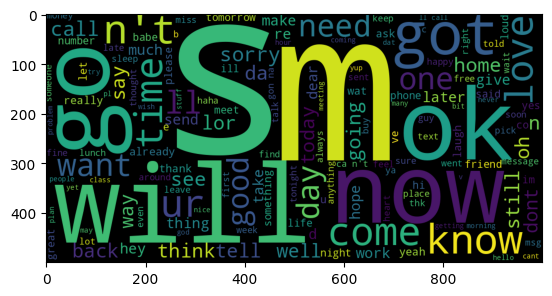

In [18]:
plt.imshow(word2)

#### Converting Category column into numerical

In [19]:
from sklearn.preprocessing import LabelEncoder
LabE = LabelEncoder()
Data1['Category'] = LabE.fit_transform(Data1['Category'])
Data1

,Category,Mail
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif you oni
2,1,free entry in 2 a weekly competition to win fa...
3,0,you dun say so early hor you c already then say
4,0,nah i do n't think he goes to usf he lives aro...
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will b going to esplanade fr home
5569,0,pity was in mood for that so any other suggest...
5570,0,the guy did some bitching but i acted like i '...


#### Feature Enginearing

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
Data2 = Data1.copy()
Data3 = Data1.copy()
Tf = TfidfVectorizer(max_features=1500)
count = CountVectorizer(ngram_range=(1,3))
Tf.fit(Data1['Mail'])
count.fit(Data2['Mail'])
x1 = Tf.transform(Data1['Mail'])
y1 = Data1['Category']
x2 = count.transform(Data2['Mail'])
y2 = Data2['Category']


#### Spliting of data into training and testing

In [21]:
from sklearn.model_selection import train_test_split
x1_train,x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = .85 ,random_state=1)
x2_train,x2_test,y2_train,y2_test = train_test_split(x2, y2, train_size=.85, random_state = 1)
x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape

((4736, 103569), (836, 103569), (4736,), (836,))

#### Avg Accuracy of all the models

In [22]:
def checking(x_train,y_train,x_test,y_test,random_state):
  from sklearn.linear_model import LogisticRegression
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.svm import SVC
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import MultinomialNB
  c_log=LogisticRegression()
  c_dis=DecisionTreeClassifier(random_state=random_state)
  c_ran=RandomForestClassifier(n_estimators=90,random_state=random_state)
  c_svm=SVC()
  c_knn=KNeighborsClassifier()
  c_nb=MultinomialNB()
  acc2=[]
  list2=[c_log,c_dis,c_ran,c_svm,c_knn,c_nb]
  for i in list2:
    i.fit(x_train,y_train)
    acc2.append(i.score(x_test,y_test))
  return sum(acc2)/len(acc2)

In [23]:
Tf_check = checking(x1_train,y1_train,x1_test,y1_test, random_state= 1)
Tf_check

0.9750797448165871

In [24]:
count_check = checking(x2_train,y2_train,x2_test,y2_test, random_state = 1)
count_check

0.9667065390749601

Here we can see that Tfidf will show max accuracy, we have to go with these rather that n-grams.

#### Logistic regression:-

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
log = LogisticRegression()
log.fit(x1_train, y1_train)

LogisticRegression()

In [26]:
y_Pred = log.predict(x1_test)

In [27]:
log.score(x1_test,y1_test)

0.9820574162679426

In [28]:
log.score(x1_train, y1_train)

0.9771959459459459

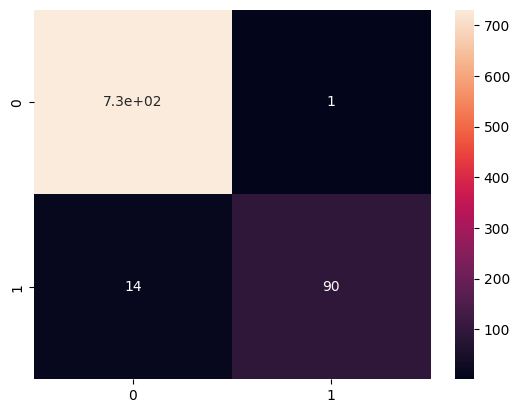

In [29]:
sns.heatmap(confusion_matrix(y1_test,y_Pred),annot=True)
plt.show()


In [89]:
print(classification_report(y1_test, y_Pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       732
           1       0.99      0.87      0.92       104

    accuracy                           0.98       836
   macro avg       0.99      0.93      0.96       836
weighted avg       0.98      0.98      0.98       836



#### Decission Tree:-

In [30]:
from sklearn.tree import DecisionTreeClassifier
decT = DecisionTreeClassifier(random_state = 12)
decT.fit(x1_train, y1_train)


DecisionTreeClassifier(random_state=12)

In [31]:
decT.score(x1_train, y1_train)

0.9995777027027027

In [32]:
decT.score(x1_test, y1_test)

0.965311004784689

In [33]:
y_pred_DS = decT.predict(x1_test)

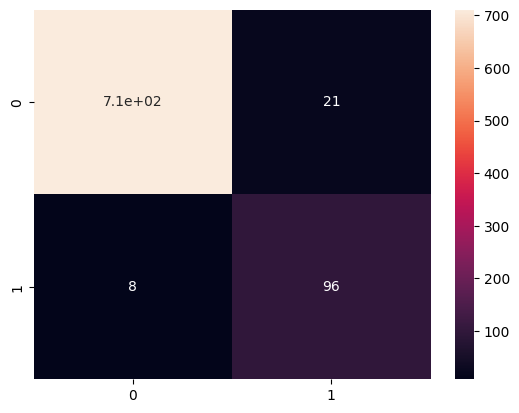

In [34]:
sns.heatmap(confusion_matrix(y1_test,y_pred_DS),annot=True)
plt.show()


In [90]:
print(classification_report(y1_test, y_pred_DS))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       732
           1       0.82      0.92      0.87       104

    accuracy                           0.97       836
   macro avg       0.90      0.95      0.92       836
weighted avg       0.97      0.97      0.97       836



#### Random Forest :-

In [35]:
from sklearn.ensemble import RandomForestClassifier
RanF = RandomForestClassifier()
RanF.fit(x1_train, y1_train)

RandomForestClassifier()

In [36]:
RanF.score(x1_train, y1_train)

0.9995777027027027

In [37]:
RanF.score(x1_test, y1_test)

0.9880382775119617

In [38]:
y_pred_RanF = RanF.predict(x1_test)

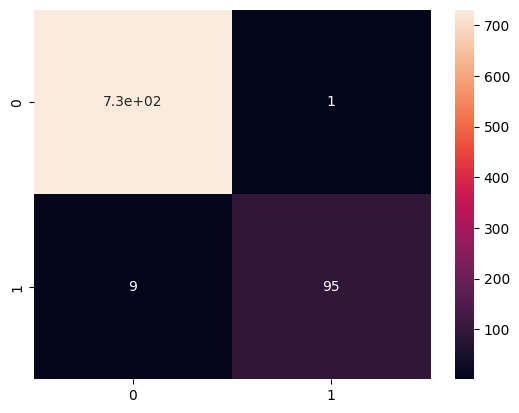

In [39]:
sns.heatmap(confusion_matrix(y1_test,y_pred_RanF),annot=True)
plt.show()


In [91]:
print(classification_report(y1_test, y_pred_RanF))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       732
           1       0.99      0.91      0.95       104

    accuracy                           0.99       836
   macro avg       0.99      0.96      0.97       836
weighted avg       0.99      0.99      0.99       836



#### Support Vector Machine:-

In [40]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x1_train, y1_train)
svc.score(x1_test, y1_test)

0.9904306220095693

In [41]:
svc.score(x1_train, y1_train)

0.9953547297297297

In [42]:
y_pred_svm = svc.predict(x1_test)

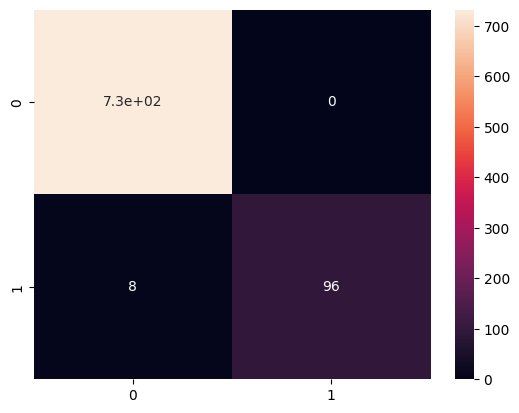

In [43]:
sns.heatmap(confusion_matrix(y1_test,y_pred_svm),annot=True)
plt.show()


In [92]:
print(classification_report(y1_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       732
           1       1.00      0.92      0.96       104

    accuracy                           0.99       836
   macro avg       0.99      0.96      0.98       836
weighted avg       0.99      0.99      0.99       836



###### Poly:-

In [44]:
svc1 = SVC(kernel = 'poly')
svc1.fit(x1_train, y1_train)

SVC(kernel='poly')

In [45]:
svc1.score(x1_test, y1_test)

0.9736842105263158

In [46]:
y_pred_poly = svc1.predict(x1_test)

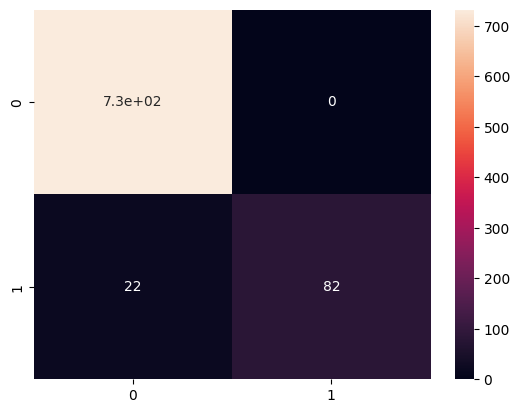

In [47]:
sns.heatmap(confusion_matrix(y1_test,y_pred_poly),annot=True)
plt.show()


In [93]:
print(classification_report(y1_test, y_pred_poly))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       732
           1       1.00      0.79      0.88       104

    accuracy                           0.97       836
   macro avg       0.99      0.89      0.93       836
weighted avg       0.97      0.97      0.97       836



###### Linear:-

In [48]:
svc2 = SVC(kernel = 'linear')
svc2.fit(x1_train, y1_train)

SVC(kernel='linear')

In [49]:
svc2.score(x1_test, y1_test)

0.9916267942583732

In [50]:
svc2.score(x1_train, y1_train)

0.9907094594594594

In [51]:
y_pred_linear = svc2.predict(x1_test)

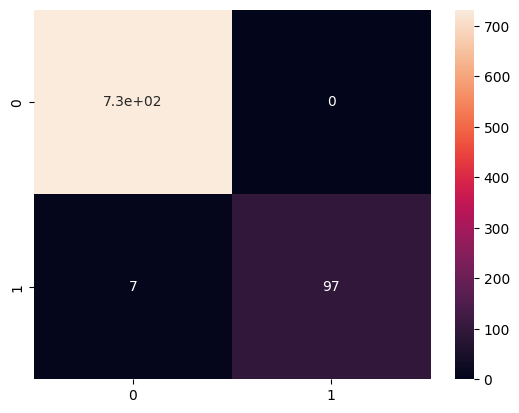

In [52]:
sns.heatmap(confusion_matrix(y1_test,y_pred_linear),annot=True)
plt.show()


In [94]:
print(classification_report(y1_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       732
           1       1.00      0.93      0.97       104

    accuracy                           0.99       836
   macro avg       1.00      0.97      0.98       836
weighted avg       0.99      0.99      0.99       836



###### Sigmoid:-

In [53]:
svc3 = SVC(kernel = 'sigmoid')
svc3.fit(x1_train, y1_train)

SVC(kernel='sigmoid')

In [54]:
svc3.score(x1_train, y1_train)

0.9856418918918919

In [55]:
svc3.score(x1_test, y1_test)

0.9892344497607656

In [56]:
y_pred_sig = svc3.predict(x1_test)

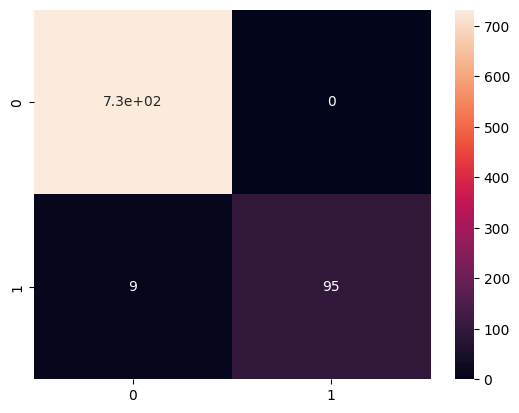

In [57]:
sns.heatmap(confusion_matrix(y1_test,y_pred_sig),annot=True)
plt.show()


In [95]:
print(classification_report(y1_test, y_pred_sig))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       732
           1       1.00      0.91      0.95       104

    accuracy                           0.99       836
   macro avg       0.99      0.96      0.97       836
weighted avg       0.99      0.99      0.99       836



#### KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x1_train, y1_train)

KNeighborsClassifier()

In [59]:
knn.score(x1_train, y1_train)

0.9398226351351351

In [60]:
knn.score(x1_test, y1_test)

0.9485645933014354

In [61]:
y_pred_knn = knn.predict(x1_test)

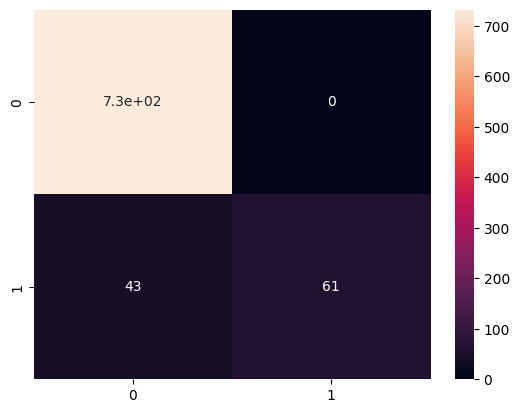

In [62]:
sns.heatmap(confusion_matrix(y1_test,y_pred_knn),annot=True)
plt.show()


In [96]:
print(classification_report(y1_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       732
           1       1.00      0.59      0.74       104

    accuracy                           0.95       836
   macro avg       0.97      0.79      0.86       836
weighted avg       0.95      0.95      0.94       836



#### Naive Bayes:-

In [63]:
from sklearn.naive_bayes import MultinomialNB
Nav = MultinomialNB()
Nav.fit(x1_train, y1_train)

MultinomialNB()

In [64]:
Nav.score(x1_train, y1_train)

0.980785472972973

In [65]:
Nav.score(x1_test, y1_test)

0.9820574162679426

In [66]:
y_pred_Nav = Nav.predict(x1_test)

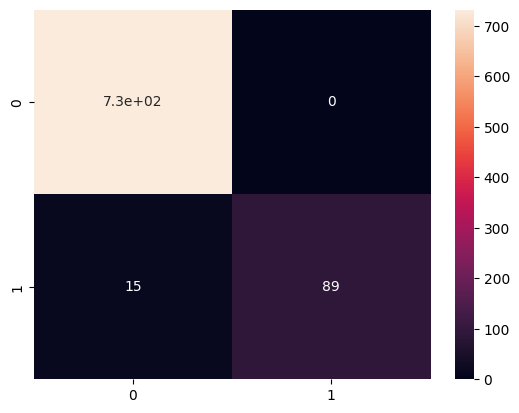

In [67]:
sns.heatmap(confusion_matrix(y1_test,y_pred_Nav),annot=True)
plt.show()


In [97]:
print(classification_report(y1_test, y_pred_Nav))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       732
           1       1.00      0.86      0.92       104

    accuracy                           0.98       836
   macro avg       0.99      0.93      0.96       836
weighted avg       0.98      0.98      0.98       836



### Ensamble Techniques:-

###### 1. Voting Classifier:-

In [68]:
from sklearn.ensemble import VotingClassifier
pre1=[('ran',RanF),('rbf', svc),('lin',svc2)]
VC = VotingClassifier(estimators=pre1)

In [69]:
VC.fit(x1_train, y1_train)

VotingClassifier(estimators=[('ran', RandomForestClassifier()), ('rbf', SVC()),
                             ('lin', SVC(kernel='linear'))])

In [70]:
VC.score(x1_train, y1_train)

0.9953547297297297

In [71]:
VC.score(x1_test, y1_test)

0.9904306220095693

In [77]:
y_pred_VC = VC.predict(x1_test)

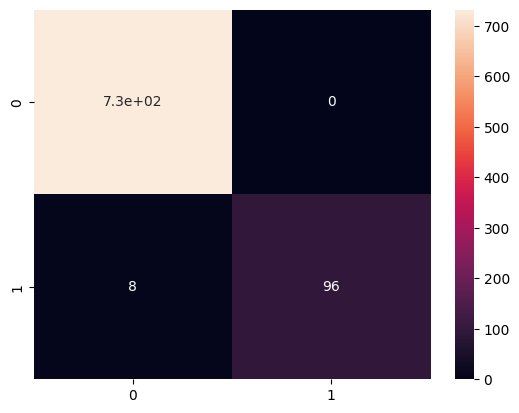

In [98]:
sns.heatmap(confusion_matrix(y1_test,y_pred_VC),annot=True)
plt.show()


In [106]:
print(classification_report(y1_test, y_pred_VC))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       732
           1       1.00      0.92      0.96       104

    accuracy                           0.99       836
   macro avg       0.99      0.96      0.98       836
weighted avg       0.99      0.99      0.99       836



###### 2.Bagging:-

In [72]:
from sklearn.ensemble import BaggingClassifier
Bag = BaggingClassifier(estimator = svc2)

In [73]:
Bag.fit(x1_train, y1_train)

BaggingClassifier(estimator=SVC(kernel='linear'))

In [75]:
Bag.score(x1_test, y1_test)

0.9916267942583732

In [76]:
Bag.score(x1_train, y1_train)

0.9894425675675675

In [78]:
y_pred_Bag = Bag.predict(x1_test)

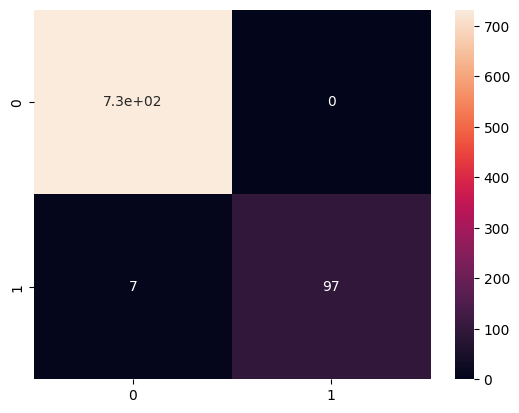

In [99]:
sns.heatmap(confusion_matrix(y1_test,y_pred_Bag),annot=True)
plt.show()


In [107]:
print(classification_report(y1_test, y_pred_Bag))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       732
           1       1.00      0.93      0.97       104

    accuracy                           0.99       836
   macro avg       1.00      0.97      0.98       836
weighted avg       0.99      0.99      0.99       836



###### Boosting:-

In [79]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [80]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
import xgboost
from xgboost import XGBClassifier

In [82]:
ada = AdaBoostClassifier(estimator = RanF , random_state = 12)
grad = GradientBoostingClassifier()
xg = XGBClassifier()

In [83]:
ada.fit(x1_train, y1_train)
grad.fit(x1_train, y1_train)
xg.fit(x1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [84]:
ada.score(x1_test, y1_test)

0.9880382775119617

In [100]:
y_pred_ada = ada.predict(x1_test)

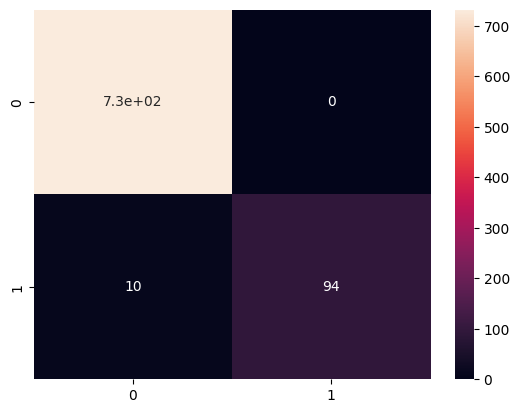

In [101]:
sns.heatmap(confusion_matrix(y1_test,y_pred_ada),annot=True)
plt.show()


In [108]:
print(classification_report(y1_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       732
           1       1.00      0.90      0.95       104

    accuracy                           0.99       836
   macro avg       0.99      0.95      0.97       836
weighted avg       0.99      0.99      0.99       836



In [85]:
grad.score(x1_test, y1_test)

0.9760765550239234

In [102]:
y_pred_grad = grad.predict(x1_test)

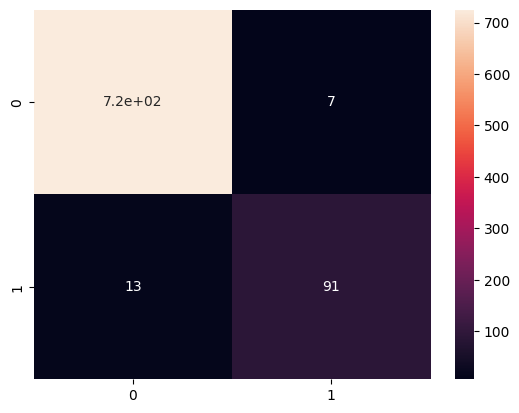

In [103]:
sns.heatmap(confusion_matrix(y1_test,y_pred_grad),annot=True)
plt.show()


In [109]:
print(classification_report(y1_test, y_pred_grad))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       732
           1       0.93      0.88      0.90       104

    accuracy                           0.98       836
   macro avg       0.96      0.93      0.94       836
weighted avg       0.98      0.98      0.98       836



In [86]:
xg.score(x1_test, y1_test)

0.9784688995215312

In [104]:
y_pred_xg = xg.predict(x1_test)

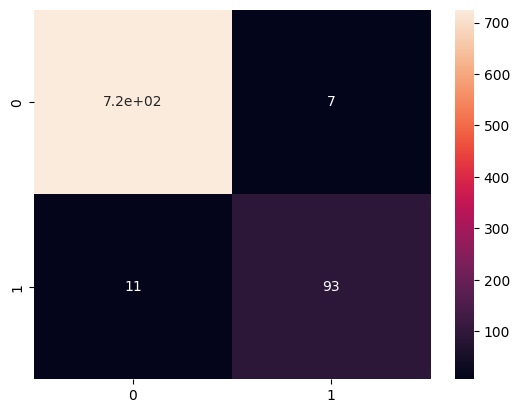

In [105]:
sns.heatmap(confusion_matrix(y1_test,y_pred_xg),annot=True)
plt.show()


In [110]:
print(classification_report(y1_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       732
           1       0.93      0.89      0.91       104

    accuracy                           0.98       836
   macro avg       0.96      0.94      0.95       836
weighted avg       0.98      0.98      0.98       836



#### Roc- Aoc Curve:-

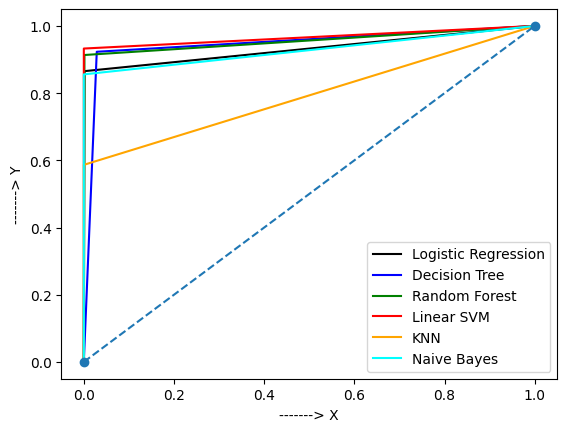

In [111]:
t_log,f_log,th_log=roc_curve(y1_test,y_Pred)
t_dis,f_dis,th_dis=roc_curve(y1_test,y_pred_DS)
t_ran,f_ran,th_ran=roc_curve(y1_test,y_pred_RanF)
t_lin,f_lin,th_lin=roc_curve(y1_test,y_pred_linear)
t_knn,f_knn,th_knn=roc_curve(y1_test,y_pred_knn)
t_nb,f_nb,th_nb=roc_curve(y1_test,y_pred_Nav)
plt.plot(t_log,f_log,color='black',label='Logistic Regression')
plt.plot(t_dis,f_dis,color='blue',label='Decision Tree')
plt.plot(t_ran,f_ran,color='green',label='Random Forest')
plt.plot(t_lin,f_lin,color='red',label='Linear SVM')
plt.plot(t_knn,f_knn,color='orange',label='KNN')
plt.plot(t_nb,f_nb,color='cyan',label='Naive Bayes')
plt.plot([0, 1], 'o--', marker='o')
plt.xlabel('-------> X')
plt.ylabel('-------> Y')
plt.legend()
plt.show()

#### Comparing Accuracy of all the models:-

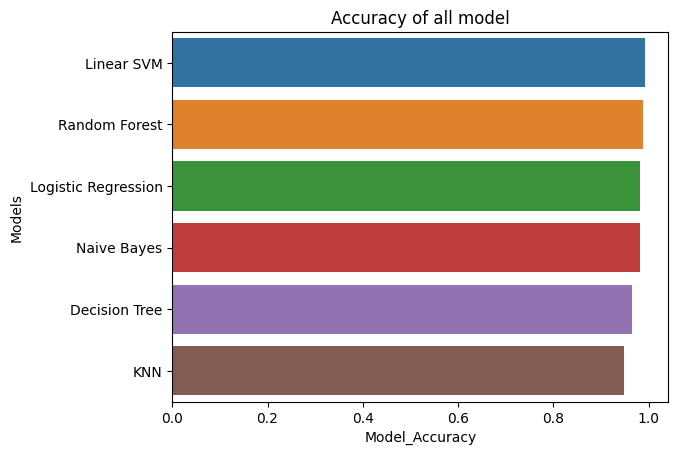

In [113]:
acc_df=pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest','Linear SVM','KNN','Naive Bayes'],
                     'Accuracy':[log.score(x1_test,y1_test),decT.score(x1_test,y1_test),RanF.score(x1_test,y1_test),svc2.score(x1_test,y1_test),
                                 knn.score(x1_test,y1_test),Nav.score(x1_test,y1_test)]})
df_dd=acc_df.sort_values('Accuracy',ascending=False)
sns.barplot(data=df_dd, x='Accuracy', y='Model')
plt.xlabel('Model_Accuracy')
plt.ylabel('Models')
plt.title('Accuracy of all model')
plt.show()